In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
df=pd.read_csv('D:\DataScience\Digit_Recognizer\\train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X=df.drop('label',axis=1)
y=df['label']

In [6]:
X.shape

(42000, 784)

In [7]:
y.shape

(42000,)

In [8]:
X=X/225

In [9]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X=X.values.reshape(-1,28,28,1)

In [11]:
X=X

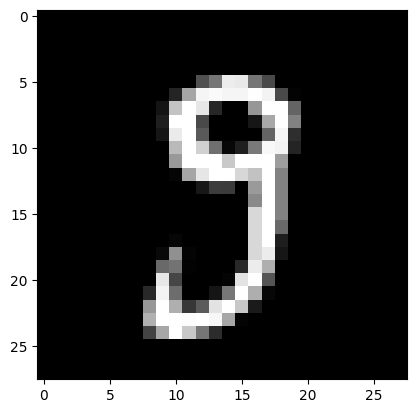

In [12]:
plt.imshow(X[40],cmap='gray')
plt.show()

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

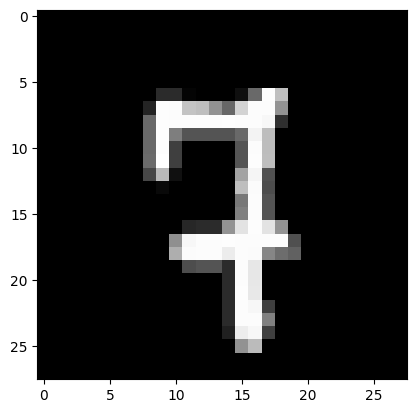

In [14]:
plt.imshow(X_train[11],cmap='gray')
plt.show()

In [15]:
X_train.shape

(33600, 28, 28, 1)

In [16]:
y_train.shape

(33600,)

In [17]:
model_non_onhot= keras.Sequential([
    #lop1 tim dac trung co ban
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    #lop2 tim dac trung phuc tap
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #duoi phang'
    layers.Flatten(),   
    #lop an loai bo 50% chong overfiting
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    #lop lay ra ket qua
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model_non_onhot.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_non_onhot.fit(X_train,y_train,
        epochs=10,#hoc 10 lan
        batch_size=64,#moi lan 64 anh
        validation_data=(X_test,y_test))#tu kiem tra

Epoch 1/10


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8816 - loss: 0.3729 - val_accuracy: 0.9763 - val_loss: 0.0801
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9652 - loss: 0.1136 - val_accuracy: 0.9833 - val_loss: 0.0527
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9759 - loss: 0.0822 - val_accuracy: 0.9851 - val_loss: 0.0467
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9810 - loss: 0.0665 - val_accuracy: 0.9863 - val_loss: 0.0460
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9825 - loss: 0.0569 - val_accuracy: 0.9879 - val_loss: 0.0376
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9845 - loss: 0.0505 - val_accuracy: 0.9876 - val_loss: 0.0377
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9865 - loss: 0.0440 - val_accuracy: 0.9885 - val_loss: 0.0370
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9875 - loss: 0.0419 - val_accuracy: 0.9888 - val_

In [18]:
score=model_non_onhot.evaluate(X_test,y_test)
score

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0391


[0.039058342576026917, 0.9889285564422607]

In [19]:
y_pred=model_non_onhot.predict(X_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


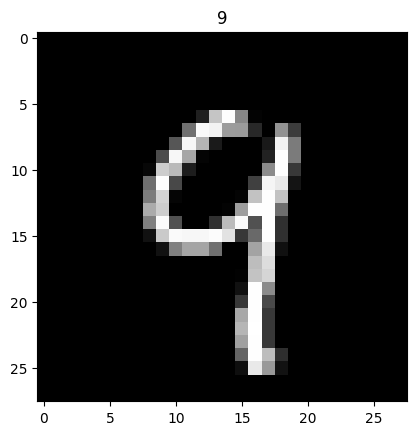

In [20]:
plt.imshow(X_test[40],cmap='gray')
plt.title(np.argmax(y_pred[40]))
plt.show()

In [21]:
y=keras.utils.to_categorical(y,10)

In [22]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
model_onhot=keras.Sequential ([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model_onhot.compile(
    optimizer='adam',    
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_onhot.fit(Xtrain,ytrain,
                epochs=10,
                batch_size=64,
                validation_data=(Xtest,ytest)
                )

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8801 - loss: 0.3786 - val_accuracy: 0.9739 - val_loss: 0.0882
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9643 - loss: 0.1205 - val_accuracy: 0.9813 - val_loss: 0.0570
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9741 - loss: 0.0882 - val_accuracy: 0.9854 - val_loss: 0.0488
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9797 - loss: 0.0684 - val_accuracy: 0.9843 - val_loss: 0.0500
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9815 - loss: 0.0593 - val_accuracy: 0.9885 - val_loss: 0.0394
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9846 - loss: 0.0507 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9859 - loss: 0.0459 - val_accuracy: 0.9907 - val_loss: 0.0305
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9868 - loss: 0.0392 - val_accuracy:

In [33]:
score_onhot=model_onhot.evaluate(Xtest,ytest)
score_onhot

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0346


[0.0346287302672863, 0.9894047379493713]